### Individual Plan

github link: https://github.com/Kevin968k/individual-project 






In [13]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=1bXyAVkKfNqk0HW7hW4HlxLYBP7iNATmD'
players <- read_csv(url)
head(players)
colnames(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] "experience"   "subscribe"    "hashedEmail"  "played_hours" "name"        
[6] "gender"       "Age"

In [14]:
url = 'https://drive.google.com/uc?export=download&id=1NRc5pb1gd9K8LV9SfyyBKSKyLv0cTUaH'

sessions <- read_csv(url)
head(sessions)
colnames(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] "hashedEmail"         "start_time"          "end_time"           
[4] "original_start_time" "original_end_time"

### 1. Data Description 

This project uses two datasets from a Minecraft research server: `players.csv` and `sessions.csv`.  
`players.csv` contains 196 unique players and 7 variables, with one row per player.  
`sessions.csv` contains 1535 recorded play sessions and 5 variables, with one row per session.  
The two datasets are linked through the anonymized identifier `hashedEmail`.

(1) players.csv
Variables include:
- `experience`: self-reported experience level (e.g., Pro, Veteran).
- `subscribe`: whether the player subscribed to the project newsletter.
- `hashedEmail`: anonymous player ID.
- `played_hours`: total hours played.
- `name`: in-game name.
- `gender`: self-reported gender.
- `Age`: age in years.

Quantitative variables include `played_hours` and `Age`; the others are categorical.  
The unit of observation is one player.

(2) sessions.csv
Variables include:
- `hashedEmail`: links session to a player.
- `start_time` : Start session times.
- `end_time`:  End session times.
- `original_start_time` : numeric timestamps.
- `original_end_time`: numeric timestamps.

Each player may appear in many rows, since each row represents one login session.

(3) Potential issues
- Possible missing values in `Age`, `gender`, or `played_hours`.
- Time variables appear in mixed formats and require conversion.
- `hashedEmail` is an identifier and should not be used as a predictor.

(4) Data collection
Demographic information was provided by players when joining the study, while session times were automatically recorded by the server. Email addresses were hashed to protect privacy.

### 2. Questions
Broad Question：
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question：
Can a player’s experience level, total playtime, Age, and gender be used to accurately predict their newsletter subscription status?





### 3. Exploratory Data Analysis and Visualization

In [17]:
players |>
  summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2))

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


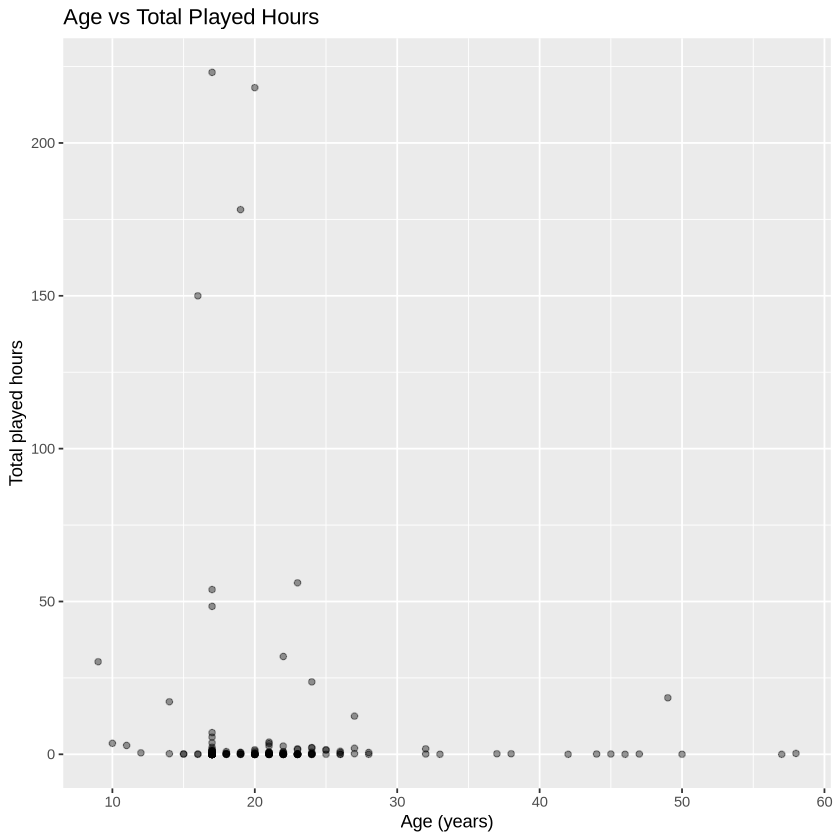

In [21]:
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
    xlab("Age (years)") +
    ylab("Total played hours") +
    labs(title = "Age vs Total Played Hours")


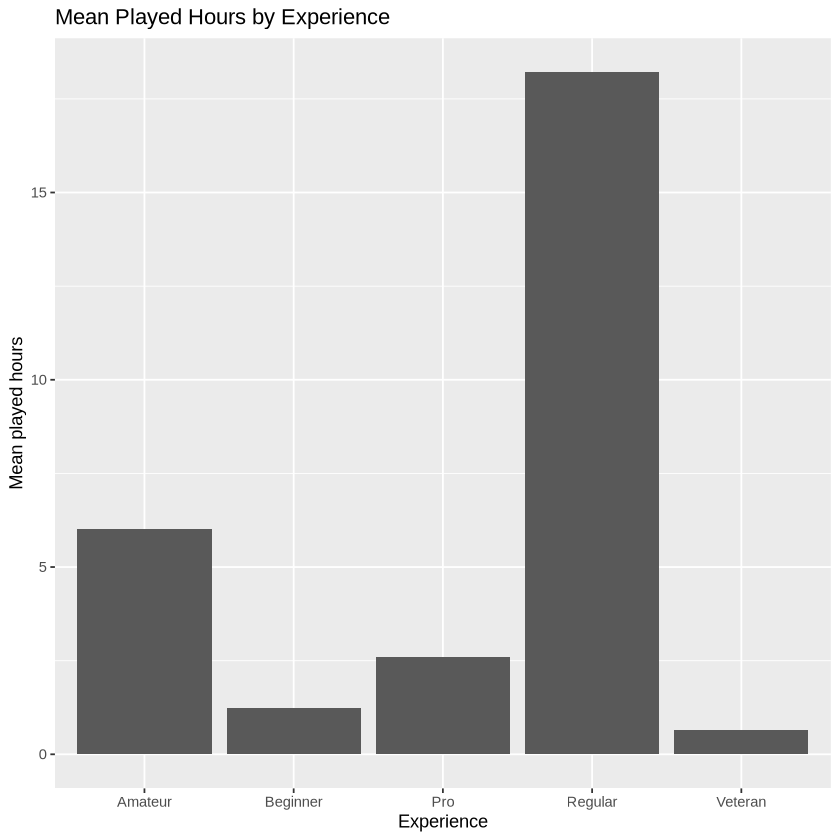

In [22]:
players |>
  group_by(experience) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(experience, mean_hours)) +
  geom_col() +
  labs(title = "Mean Played Hours by Experience",
       x = "Experience",
       y = "Mean played hours")

### Insight
From the scatterplot of Age versus played hours, most players appear to cluster at relatively low total playtime across a wide range of ages. There is no clear visual relationship between age and total hours played, although a small number of older players show higher values. This indicates significant variation in game duration within each age group.

The bar chart comparing mean played_hours across experience levels shows clear differences between groups. Regular players have the highest average playtime, while Beginners and Veterans show much lower averages. This indicates that self-reported experience level is associated with substantial differences in typical play behaviour. These patterns provide crucial insights for understanding variations in player engagement.

### 4. Methods and Plan
 I plan to use logistic regression method, because my outcome variable subscribe has two categories, and logistic regression is simple and appropriate for the type of predictors in my dataset.
 This method assumes that the observations are independent and that numerical predictors have a roughly linear relationship with the log-odds of the outcome. These assumptions may not hold perfectly, but they are reasonable for an introductory predictive model.

A limitation of this method is that it may not capture non-linear relationships or interactions between variables. There may also be imbalance in the number of subscribed vs non-subscribed players, which could affect performance.

For evaluation, I plan to split the data into training (70%) and testing (30%) sets. I will use cross-validation on the training set to choose the final model and then evaluate it on the test set using accuracy and other classification metrics.
